# Motivation
The goal of this code is to use neural network as a feature extractor. Instead of coming up with phase space variables for the Q-Factor analysis maybe we can use a neural network to determine this for us. 

We saw that Q-Factors performs well on a0+a2, purely combinatorial background. Performs poorly when combined with more background especially from b1 background. If we can include some phase space variables that helps separate out b1 signal from a0 or a2 signal MC then we might be able to perfrom better

In [133]:
from root_pandas import read_root
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch # pytorch is a machine learning library 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader 

ImportError: No module named torch

# Data exploration

In [65]:
columns=[
        "mcprocess",
        "cosThetaHighestEphotonIneta_gj",
        "cosThetaHighestEphotonInpi0_cm",
        "vanHove_omega",
        "pi0_energy",
        "mandelstam_teta"
        ]
df=read_root("./allMC_trees.root","degALL_acc_mEllipse_tree_flat",
             columns=columns)

In [52]:
mapIDtoProc={
    0:"a0",
    1:"a2",
    2:"b1to5g",
    3:"a2pi",
    4:"etap",
    5:"eta",
    6:"f1_1285",
    7:"omega",
    8:"pi0pi0"
}

In [93]:
procs=[0,1,2]
def overlayHist(data,var,ax):
    binedges=np.histogram(data[var],bins=75)[1]
    for proc in procs:
        data[data.mcprocess==proc][var].hist(bins=binedges,normed=True,alpha=0.4,
                                             label=mapIDtoProc[proc],ax=ax)
        ax.set_title(var,size=16)

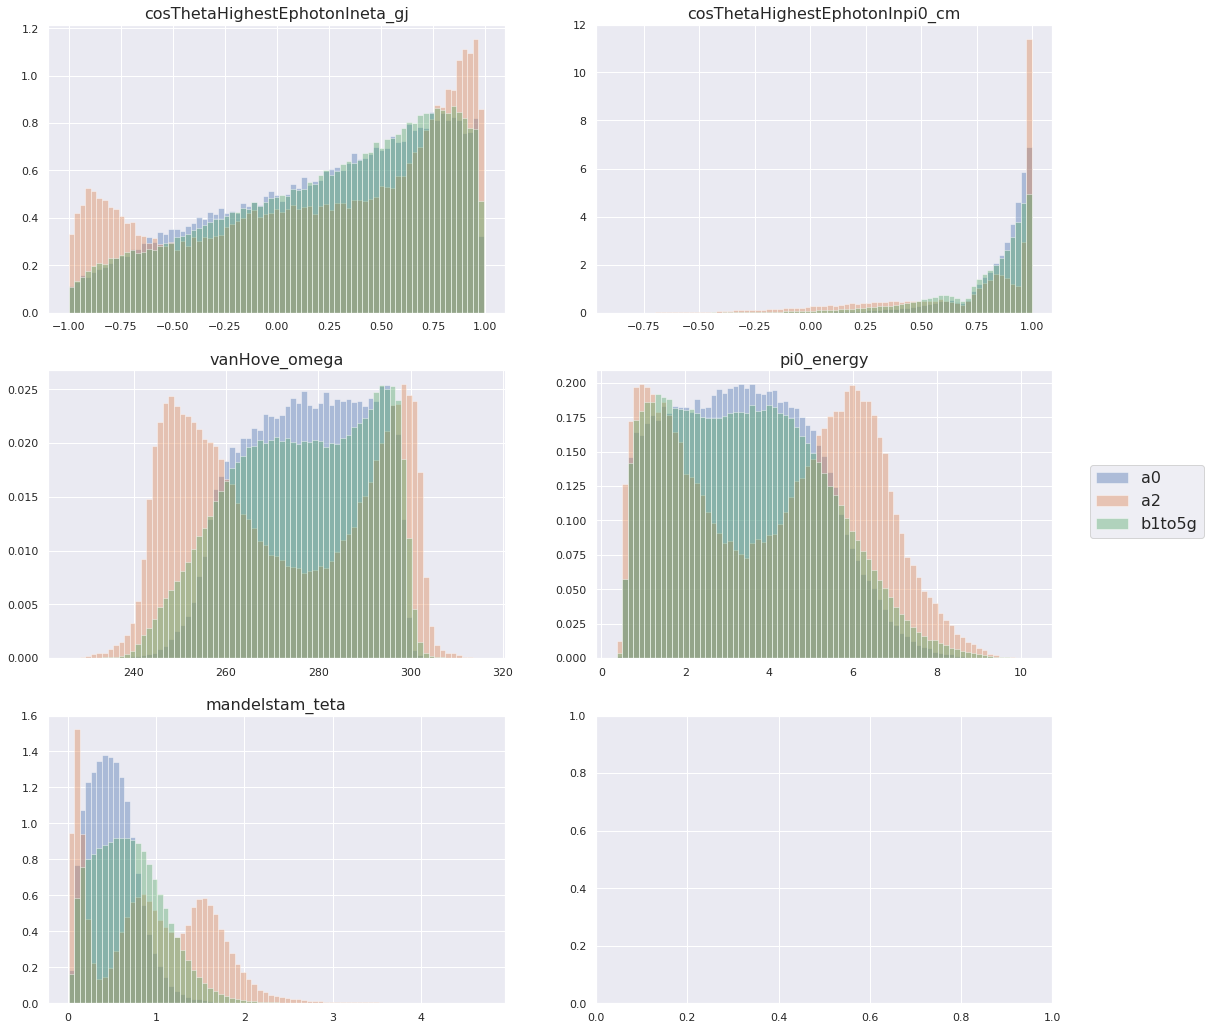

In [94]:
fig, axes = plt.subplots(3,2,figsize=(18,18))
axes = axes.flatten()
for iax,col in enumerate(columns[1:]):
    overlayHist(df,col,axes[iax])
axes[1].legend(prop={"size":16},bbox_to_anchor=(1.35,-0.5))

# Prepare data for pytorch

In [112]:
data = df[df.mcprocess<3]
dataX = data.drop("mcprocess",axis=1)
dataY = data.mcprocess
# grouping a0 and a2 into one class and b1 as the other
binaryClassMap = {
    0:0,
    1:0,
    2:1
}
dataY = dataY.map(binaryClassMap)

In [129]:
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX,dataY,test_size=.2,random_state=14)
scaler = StandardScaler()
dataX_train = scaler.fit_transform(dataX_train.values)
dataX_test = scaler.transform(dataX_test.values)

In [132]:
class dataset(Dataset):
    def __init__(self, dataX, dataY):
        self.dataX = dataX
        self.dataY = dataY
        
    def __len__(self):
        return len(self.dataX)
    
    def __getitem__(self, index):
        X = self.dataX.iloc[index]
        y = self.data.iloc[index].long()
        return image, label

NameError: name 'Dataset' is not defined